In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# renders graph image within the notebook
%matplotlib inline                                     

In [4]:
df = pd.read_csv('Dataset\Salary_dataset.csv')

In [5]:
df

,YearsExperience,Salary
0,1.2,39344.0
1,1.4,46206.0
2,1.6,37732.0
3,2.1,43526.0
4,2.3,39892.0
5,3.0,56643.0
6,3.1,60151.0
7,3.3,54446.0
8,3.3,64446.0
9,3.8,57190.0


Text(0, 0.5, 'Salary')

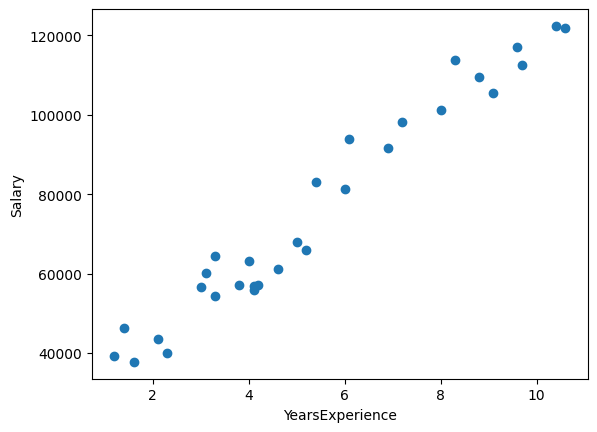

In [6]:
plt.scatter(df['YearsExperience'],df['Salary'])
plt.xlabel('YearsExperience')
plt.ylabel('Salary')

In [7]:
df.corr()

,YearsExperience,Salary
YearsExperience,1.000000,0.978242
Salary,0.978242,1.000000


In [8]:
# divide into independent and dependent feature
X = df[['YearsExperience']]      # this has to be 2D(column need to be considered because independent features can be                                 more than one) thats why double brackets are needed
y = df['Salary']                 # this can be a series(1D)

In [9]:
# train test split
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [10]:
# standardization
'''
Our data can be in various formats i.e., numbers (integers) & words (strings), for now, we’ll consider only the numbers in our Dataset.

Assume our dataset has random numeric values in the range of 1 to 95,000 (in random order).If we just look at these values, their range is so high, that while training the model with 10,000 such values will take lot of time. That’s where the problem arises.

Understanding standardization
We have a solution to solve the problem arisen i.e. Standardization. It helps us solve this by : 
    Down Scaling the Values to a scale common to all, usually in the range -1 to +1.
    And keeping the Range between the values intact.
'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [11]:
# Apply linear regression Algorithm

from sklearn.linear_model import LinearRegression

regression = LinearRegression()

regression.fit(X_train,y_train)

LinearRegression()

In [12]:
print("Slope of the linear equation : ", regression.coef_)                                 # slope(m)

Slope of the linear equation :  [25063.1519945]


In [13]:
print("Intercept of the linear equation : ", regression.intercept_)                             # intercept(c)

Intercept of the linear equation :  70417.40909090909


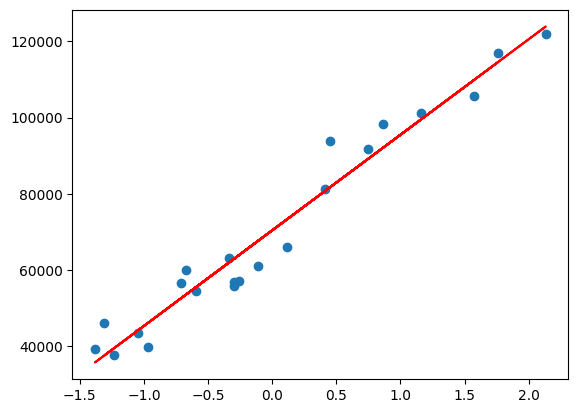

In [14]:
# plot best fit line for training data
plt.scatter(X_train,y_train)
plt.plot(X_train, regression.predict(X_train),color="red")

# Predictions for Test Data

In [15]:
y_pred_test = regression.predict(X_test)

In [16]:
# Performance metrics
from sklearn.metrics import mean_absolute_error, mean_squared_error

mae = mean_absolute_error(y_test, y_pred_test)
mse = mean_squared_error(y_test, y_pred_test)
rmse = np.sqrt(mse)

print("Mean absolute error : ", mae)
print("Mean square error : ", mse)
print("Room Mean square error : ", rmse)

Mean absolute error :  5056.9954666635895
Mean square error :  38802588.99247059
Room Mean square error :  6229.172416338352


In [17]:
from sklearn.metrics import r2_score

r2score = r2_score(y_test, y_pred_test)
print("Accuracy : ", 100*r2score,"%")

Accuracy :  93.47210011126784 %


## Linear Regression through OLS method

In [18]:
import statsmodels.api as sm

In [19]:
model = sm.OLS(y_train, X_train).fit()

In [20]:
predictions = model.predict(X_test)

In [21]:
print(model.summary())

                                 OLS Regression Results                                
Dep. Variable:                 Salary   R-squared (uncentered):                   0.112
Model:                            OLS   Adj. R-squared (uncentered):              0.070
Method:                 Least Squares   F-statistic:                              2.645
Date:                Thu, 11 Jul 2024   Prob (F-statistic):                       0.119
Time:                        22:39:26   Log-Likelihood:                         -276.85
No. Observations:                  22   AIC:                                      555.7
Df Residuals:                      21   BIC:                                      556.8
Df Model:                           1                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

prediction of unknown input

In [24]:
regression.predict(scaler.transform([[10]]))

c:\Users\MUKUL\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\base.py:465: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(


array([118252.186625])